In [160]:
# Generar dataset y plot para clasificación binaria
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [166]:
# Generar dataset
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=1, cluster_std=3)

In [171]:
X_df = pd.DataFrame(X, columns=['x1','x2'])
y_df = pd.DataFrame(y, columns=['Clase'])
Frames = [X_df, y_df]
Data = pd.concat(Frames, axis=1)
Data.head()

,x1,x2,Clase
0,-5.855998,4.651793,0
1,-5.833791,-3.274749,1
2,7.433011,6.880244,0
3,-8.022102,-0.956644,1
4,-14.719933,-3.651568,1


In [198]:
# Definir los límites del dominio
min1, max1 = X[:,0].min()-1, X[:,0].max()+1
min2, max2 = X[:,1].min()-1, X[:,1].max()+1
# Definir las escalas de X e y
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# Crear la cuadrícula de la grilla
xx, yy = np.meshgrid(x1grid, x2grid)
# Aplanar (flatten) cada grilla a un vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1),1)), r2.reshape((len(r2),1))
# Apilar los vectores lado a lado como columnas en un dataset de entrada
grid = np.hstack((r1,r2))
Datos = pd.DataFrame(grid, columns=['r1','r2'])
Datos.head()
#plt.scatter(r1,r2)

,r1,r2
0,-19.372045,-14.413421
1,-19.272045,-14.413421
2,-19.172045,-14.413421
3,-19.072045,-14.413421
4,-18.972045,-14.413421


In [149]:
# Definir el modelo
model = LogisticRegression()
#model = QuadraticDiscriminantAnalysis()
# Fit del modelo
model.fit(X, y)

LogisticRegression()

In [150]:
# Predecir con el modelo
y_pred = model.predict_proba(grid)
# Quedarse sólo con las probabilidades para la clase 0
y_pred = y_pred[:,0]

In [151]:
# Evaluar las predicciones
#Acc = accuracy_score(y, y_pred)
Acc_1 = model.score(X, y)
print(f'Accuracy: {Acc}')
print(Acc_1)

Accuracy: 0.972
0.972


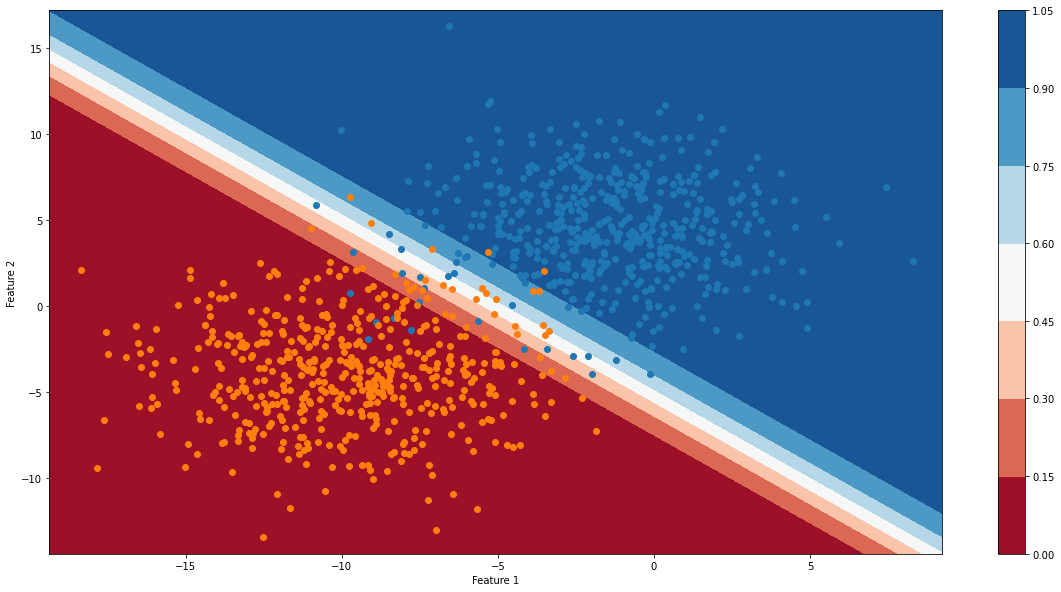

In [200]:
# Reshape de las predicciones en una grilla
zz = y_pred.reshape(xx.shape)
f = plt.figure(figsize=(20,10))
# Dibujar la grilla de x, y, z como una superficie
Decision_Sup = plt.contourf(xx, yy, zz, cmap='RdBu')
# Agregar una leyenda para interpretar los colores (colorbar)
plt.colorbar(Decision_Sup)
# Dibujar scatter plot para las muestras de cada clase
for Clase_Valor in range(2):
    # Obtener índices de filas para las muestras en esta clase
    fila_idx = np.where(y == Clase_Valor)
    # Crear scatter de estas muestras
    plt.scatter(X[fila_idx,0], X[fila_idx,1], cmap='Paired')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Mostrar grafico
plt.show()